In [1]:
import matplotlib.pyplot as plt
import matplotlib

import os
import pandas as pd
import numpy as np

In [2]:
df_mean_dict = dict()
df_std_dict = dict()
for file in os.listdir("./results/processed_results"):
    if ".csv" not in file: continue
    df = pd.read_csv("./results/processed_results/" + file, index_col = 0)
    if "mean" in file:
        df_mean_dict[file] = df
    if "std" in file:
        df_std_dict[file] = df

In [3]:
df_mean_dict['mysql_mysql_list_mean.csv']

,create,update_nodes,update_edges,delete,read_1,read_in_mem_1,read_2,read_in_mem_2,read_3,read_in_mem_3,name
0,82.843214,0.172216,2.057480,0.762958,10.500847,6.636133,114.067588,14.591223,507.512360,24.452644,PPI
1,3.117776,0.346969,0.331801,0.547878,5.115432,0.594744,11.210655,0.810749,38.029713,1.077273,1000_nodes_5_edges
2,3.984512,0.294964,0.199948,0.468836,6.448449,0.627067,29.174258,0.985868,88.482195,1.580596,1000_nodes_10_edges
3,4.977898,0.263468,0.229499,0.308222,8.849448,0.691418,65.735489,1.280599,131.840905,2.835685,1000_nodes_20_edges
4,2.204477,0.323163,0.270842,0.326822,1.208131,0.140182,2.807991,0.173814,6.566856,0.210457,1000_nodes_scale_free
5,10.293650,0.315830,0.325506,0.416008,5.127191,0.818839,11.328628,1.704898,40.573106,2.491445,10000_nodes_5_edges
6,16.635759,0.240275,0.226743,0.422132,6.382924,1.081237,30.359960,2.638477,112.801579,4.794098,10000_nodes_10_edges
7,25.814523,0.187781,0.196798,0.406997,8.895961,1.631098,73.617925,4.573798,519.575829,8.851663,10000_nodes_20_edges
8,6.208971,0.350562,0.260005,0.395926,1.462919,0.173572,7.568661,0.267040,26.365580,0.391349,10000_nodes_scale_free
9,99.620131,0.317207,0.262066,0.405996,5.330483,3.066239,11.748134,10.541885,41.841897,15.607134,100000_nodes_5_edges


In [4]:
def get_headers(df_dict):
    for key in df_dict:
        df_data = df_dict[key].iloc[:, :-1]
        return df_data.columns

In [5]:
def get_index(df_dict):
    for key in df_dict:
        df_data = df_dict[key].iloc[:, :-1]
        df_names = df_dict[key].iloc[:, -1]
        return df_names

In [6]:
def get_header_dict(df_dict):
    header_dfs_dict = dict()
    for header in get_headers(df_dict):
        header_dfs_dict[header] = pd.DataFrame(index = get_index(df_dict))
    for key in df_dict:
        print(key)
        experiment_name = "_".join(key.split("_")[-3:-1])
        df_names = df_dict[key].iloc[:, -1]
        df_data = df_dict[key].iloc[:, :-1]
        header = df_data.columns
        for column in header:
            header_dfs_dict[column][experiment_name] = df_data[column].values
    for hop in range(1,4,1):
        header_dfs_dict[f"read_{hop}"]["in_mem_col"] = header_dfs_dict[f"read_in_mem_{hop}"]["postgres_col"].values
        header_dfs_dict[f"read_{hop}"]["in_mem_list"] = header_dfs_dict[f"read_in_mem_{hop}"]["postgres_list"].values
    return header_dfs_dict

In [7]:
header_dfs_dict = get_header_dict(df_mean_dict)

neo4j_neo4j_list_mean.csv
mysql_mysql_list_mean.csv
postgres_col_mean.csv
postgres_postgres_list_mean.csv
mysql_col_mean.csv
neo4j_col_mean.csv


In [8]:
header_dfs_std_dict = get_header_dict(df_std_dict)

mysql_mysql_list_std.csv
neo4j_neo4j_list_std.csv
neo4j_col_std.csv
mysql_col_std.csv
postgres_col_std.csv
postgres_postgres_list_std.csv


In [9]:
header_dfs_std_dict

{'create':                           mysql_list  neo4j_list  neo4j_col  mysql_col  \
 name                                                                     
 PPI                         2.373407    0.612848   0.522166   2.865702   
 1000_nodes_5_edges          0.253070    0.131873   0.160350   0.240379   
 1000_nodes_10_edges         0.187728    0.037285   0.031387   0.184962   
 1000_nodes_20_edges         0.170868    0.026907   0.112401   0.194151   
 1000_nodes_scale_free       0.117714    0.014222   0.074503   0.060933   
 10000_nodes_5_edges         0.250046    0.258471   0.117673   0.176583   
 10000_nodes_10_edges        0.432813    0.294604   0.104291   0.642275   
 10000_nodes_20_edges        0.624128    0.279569   0.145794   0.585507   
 10000_nodes_scale_free      0.191911    0.073037   0.223251   0.154372   
 100000_nodes_5_edges        4.853033    0.385309   0.486553   1.227136   
 100000_nodes_10_edges       5.220302    0.408561   0.442705   1.641637   
 100000_nodes_2

In [10]:
for key in header_dfs_dict:
    print(key)
    print(header_dfs_dict[key].max(0))
    print(header_dfs_std_dict[key].max(0))
    print(header_dfs_dict[key])
    
    print(30*"_")

create
neo4j_list        193.719621
mysql_list       3109.116294
postgres_col      105.284823
postgres_list     113.560343
mysql_col        2987.013861
neo4j_col         396.471177
dtype: float64
mysql_list       16.803025
neo4j_list        1.221127
neo4j_col         2.594748
mysql_col        31.573013
postgres_col      0.621382
postgres_list     0.836280
dtype: float64
                          neo4j_list   mysql_list  postgres_col  \
name                                                              
PPI                        32.848451    82.843214     16.866286   
1000_nodes_5_edges          0.402133     3.117776      0.490246   
1000_nodes_10_edges         0.412362     3.984512      0.581463   
1000_nodes_20_edges         0.559091     4.977898      0.710901   
1000_nodes_scale_free       0.150036     2.204477      0.441831   
10000_nodes_5_edges         1.834199    10.293650      1.330074   
10000_nodes_10_edges        3.165144    16.635759      1.943954   
10000_nodes_20_edges    

In [11]:
header_dfs_dict["update_edges"].max(0)

neo4j_list        438.751444
mysql_list          5.773404
postgres_col        3.988372
postgres_list       3.911107
mysql_col           5.851539
neo4j_col        5380.045029
dtype: float64

In [12]:
def sort_and_filter_df(df, filter_key):
    df = df.sort_index(axis=1)
    df = df.loc[:, list(filter(lambda col: filter_key in col, df.columns))]
    return df

In [13]:
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 16}

db_colors = {
    "neo4j": "blue",
    "postgres": "orange",
    "mysql": "red",
    "in_mem": "black"
}

matplotlib.rc('font', **font)

def plot_crud_operations(header_dfs_dict, header_dfs_std_dict, filter_key = "col", log_scale = True):
    for key in header_dfs_dict:
        if "in_mem" in key: continue
        df = header_dfs_dict[key]
        df_std = header_dfs_std_dict[key]
        df = sort_and_filter_df(df, filter_key)
        df_std = sort_and_filter_df(df_std, filter_key)        
        num_cols = len(df.columns)
        x = np.arange(len(df))  # x-axis positions
        width = 0.8 / num_cols  # Adjust bar width to avoid excessive overlap
    
        fig, ax = plt.subplots(figsize=(26, 4))
        
        for i, col in enumerate(df.columns):
            color = db_colors[list(filter(lambda key: key in col, db_colors))[0]]
            db_label = " ".join(col.split("_")[0:-1])
            ax.bar(x + i * width, df[col], width=width, label=db_label, color = color, yerr = df_std[col])
    
        if log_scale:
            ax.set_yscale('log')  # Log-scale base 10
        filter_key_title_dict = {
            "col": "(Columns)",
            "list": "(List)",
        }
        title = key
        if "read" in title.lower():
            title = title.replace("_", "- subgraph depth ")
        title = title.replace("_", " ")
        ax.set_title(title.title() + " "+ filter_key_title_dict[filter_key])
        ax.set_xticks(x + width * (num_cols / 2 - 0.5))  # Center xticks

        def process_dataset_label(label:str):
            return label.replace("nodes", "N\n").replace("edges", "E").replace("scale_free", "SF").replace("_", "")[::-1].replace("000", "000,")[::-1]
        dataset_label = list(map(process_dataset_label, df.index))
        ax.set_xticklabels(dataset_label) #, rotation=90
        sec = ax.secondary_xaxis(location=0)
        sec.set_xticks([.25, 2.75, 6.75,  10.75, 13.75], labels=['\n\nReal-world', '\n\nSmall', '\n\nMedium', '\n\nLarge', '\n\nLargest'])
        sec.tick_params('x', length=0)
        sec2 = ax.secondary_xaxis(location=0)
        sec2.set_xticks([-.5, .75, 4.75, 8.75, 12.75], labels=[])
        sec2.tick_params('x', length=40, width=1.5)
        ax.legend()
        ax.grid(which = "both", axis = "y")
        ax.grid(which = "major", axis = "x")
        plt.ylabel("Time [s]")
        plt.xlabel("\nDataset")
        plt.show()

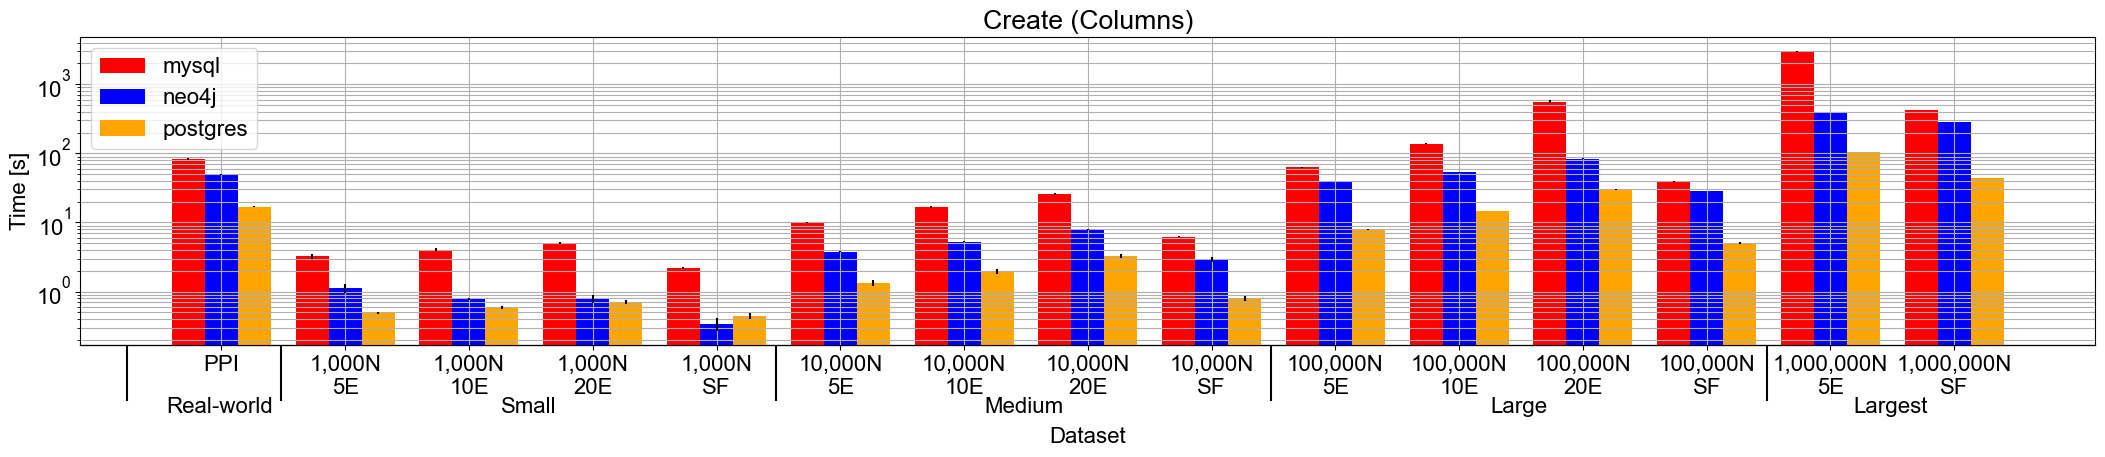

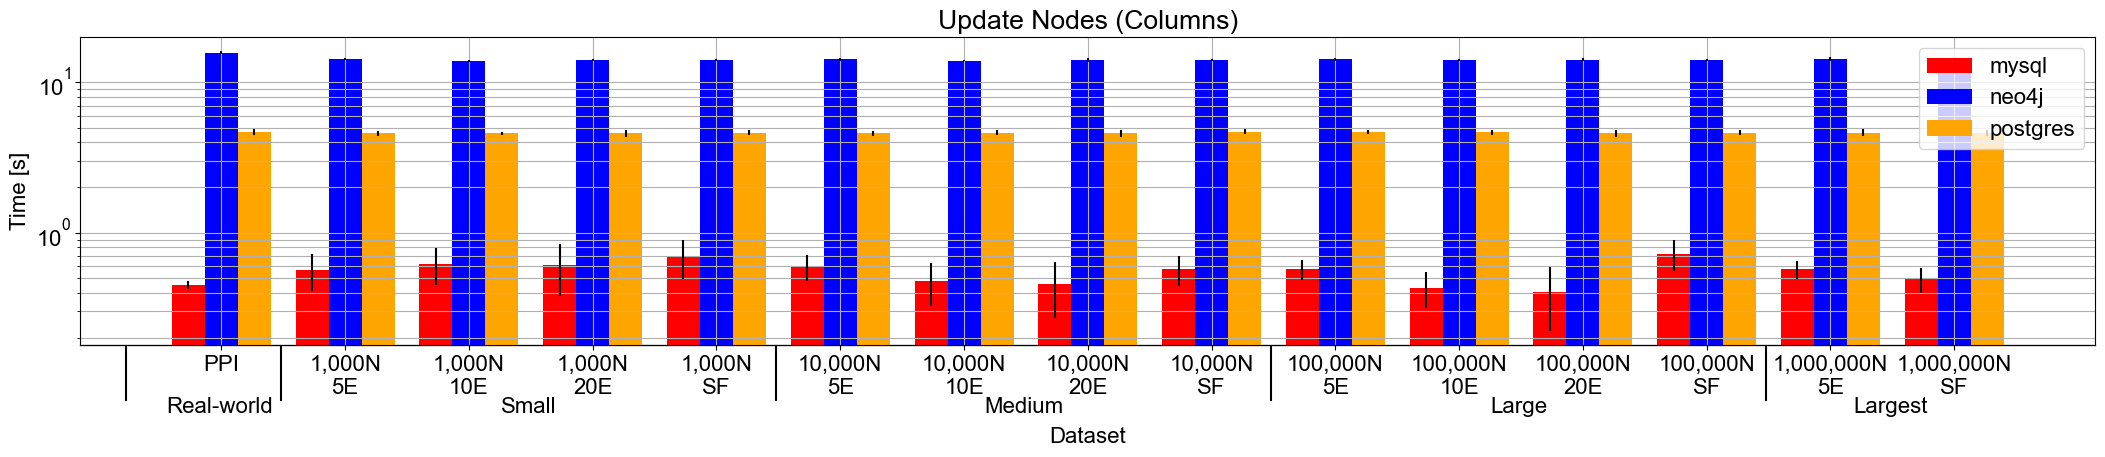

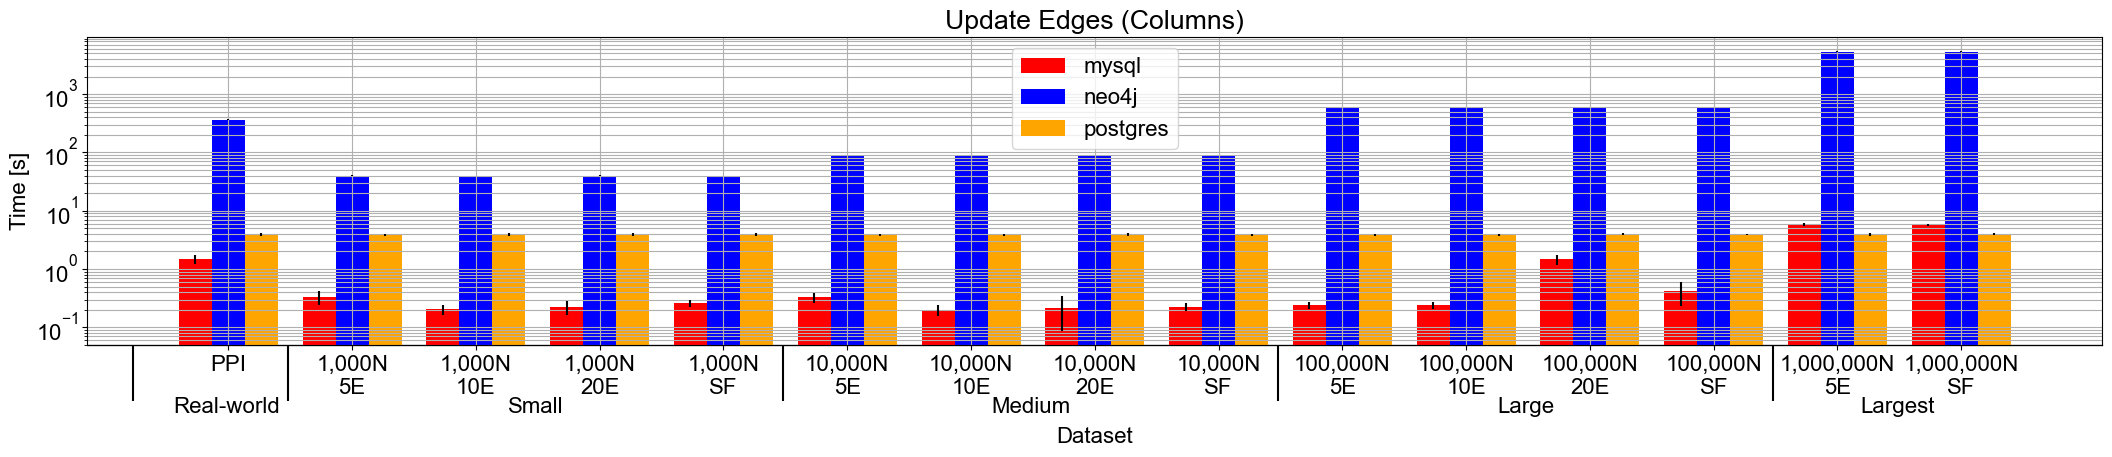

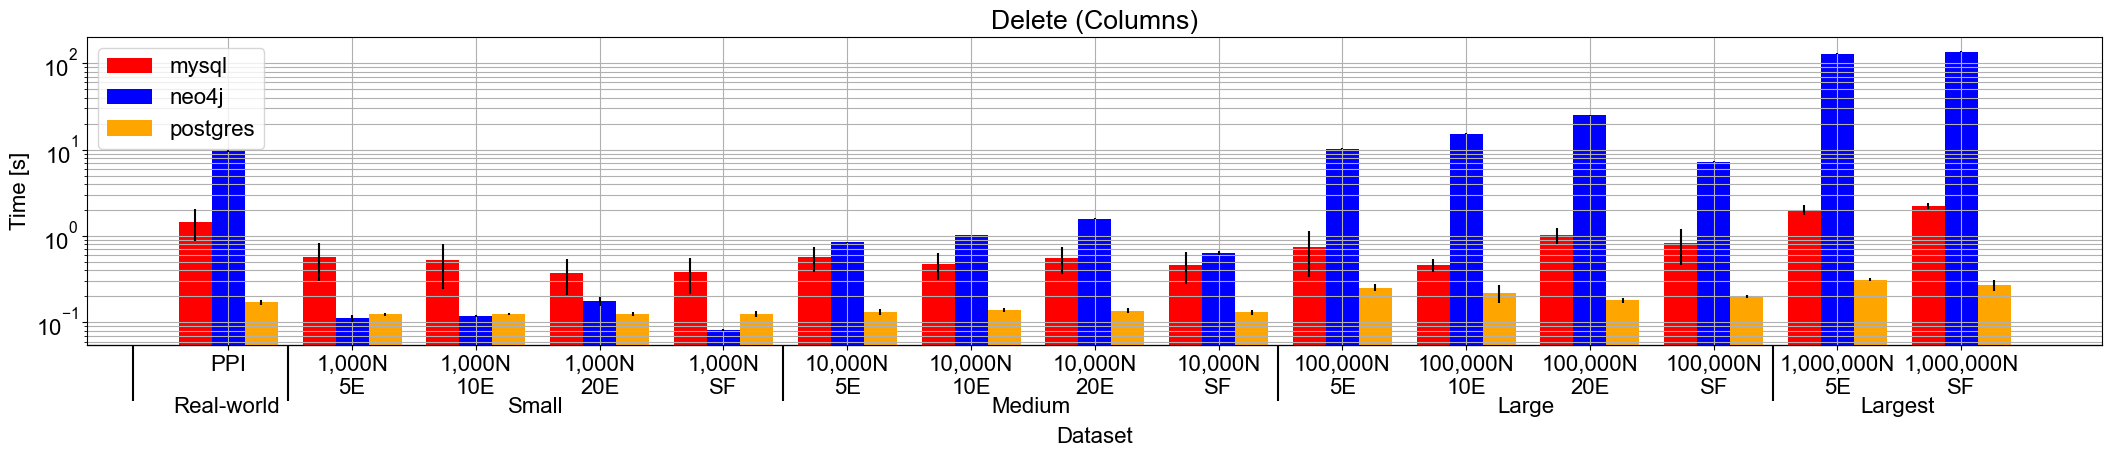

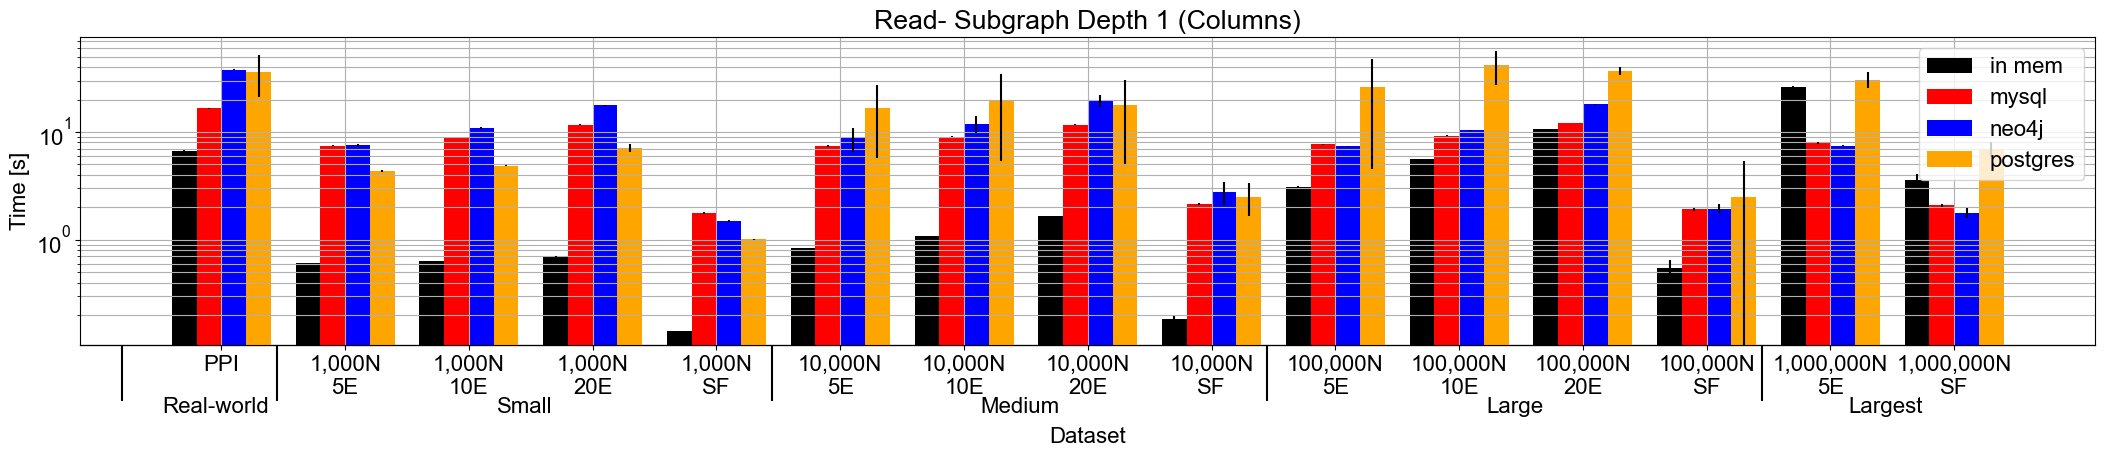

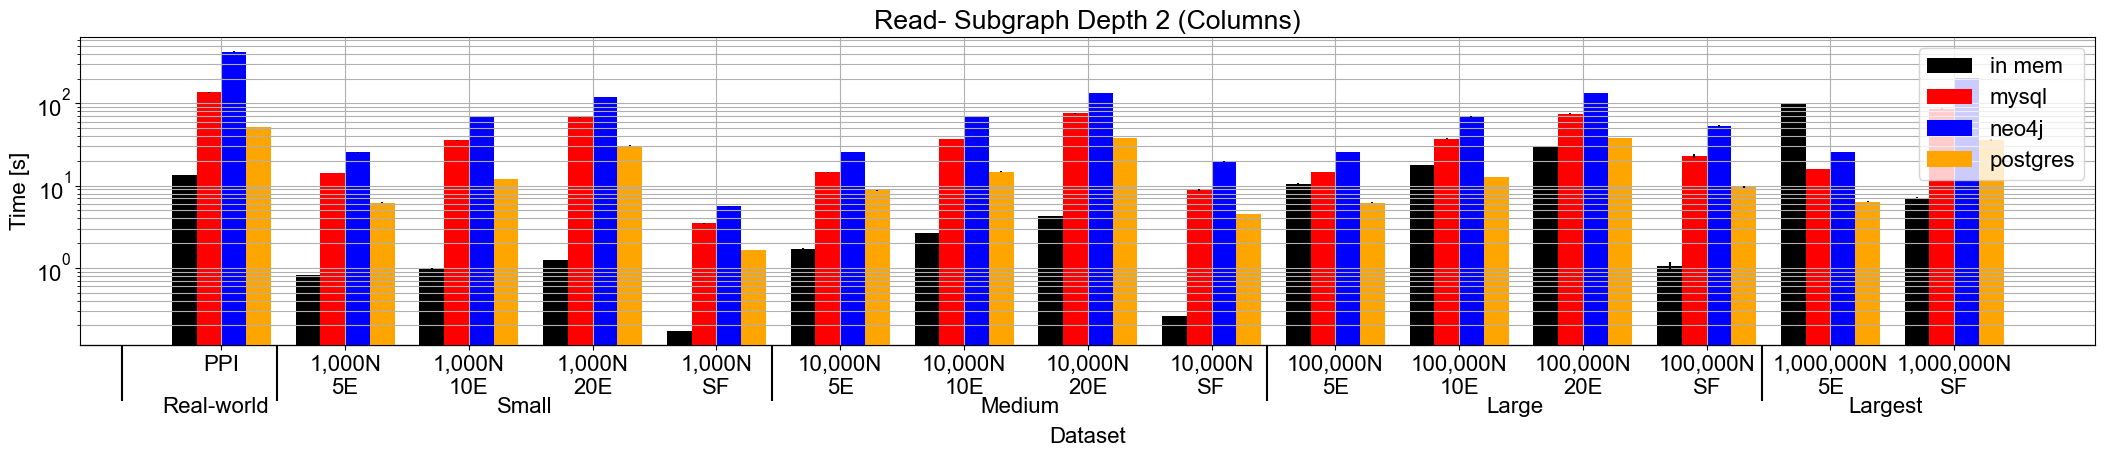

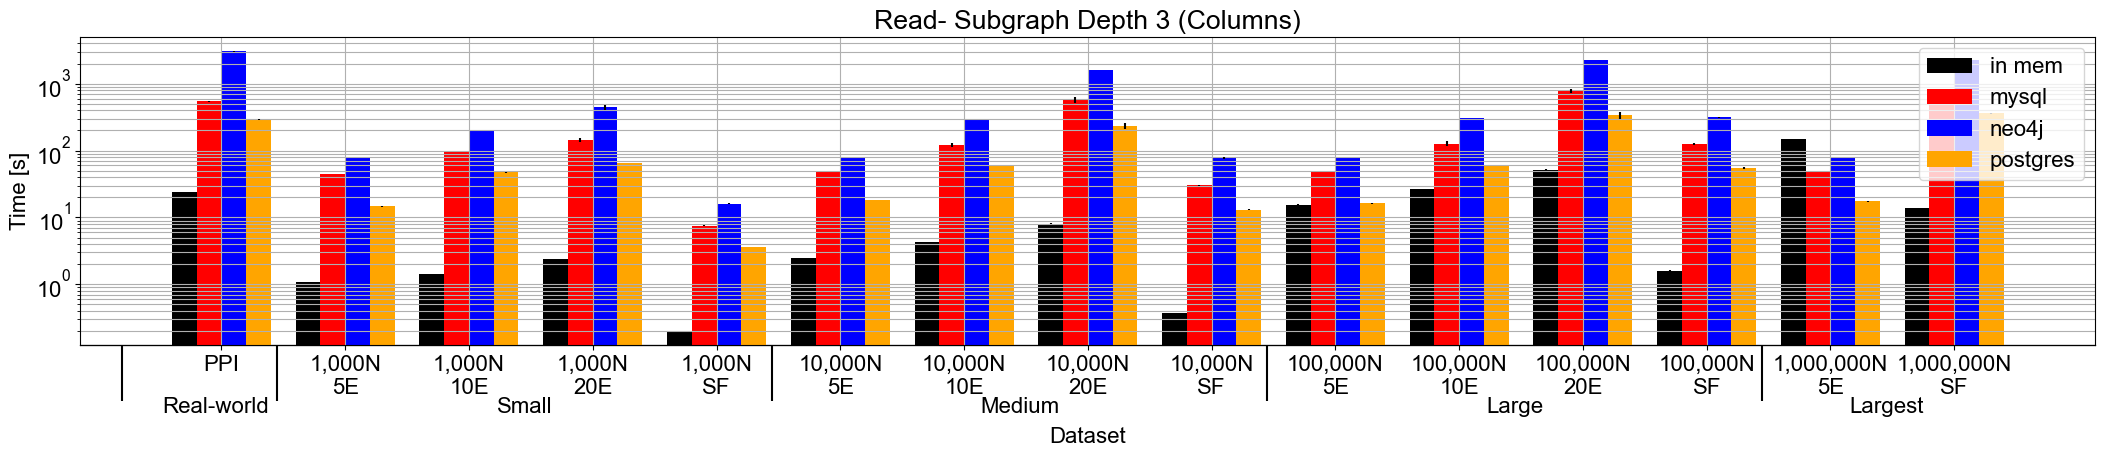

In [14]:
plot_crud_operations(header_dfs_dict, header_dfs_std_dict)

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font = {'family': 'arial',
        'weight': 'normal',
        'size': 31}

db_colors = {
    "neo4j": "blue",
    "postgres": "orange",
    "mysql": "red",
    "in_mem": "black"
}

matplotlib.rc('font', **font)

def plot_crud_operations(header_dfs_dict, header_dfs_std_dict, filter_key="col", read_plot = True):
    # Collect all valid keys
    valid_keys = [key for key in header_dfs_dict if "in_mem" not in key]
    if read_plot:
        valid_keys = list(filter(lambda key: "read" in key, valid_keys))
    if not read_plot:
        valid_keys = list(filter(lambda key: "read" not in key, valid_keys))
    n_subplots = len(valid_keys)
    
    # Create vertical subplots (n rows, 1 column)
    height = 8 if read_plot else 10
    fig, axes = plt.subplots(n_subplots, 1, figsize=(30, height * n_subplots))
    if n_subplots == 1:  # Ensure axes is always iterable
        axes = [axes]
    
    legend_entries = {}  # Dictionary to track unique legend entries
    db_label_dict = {
        "mysql": "MySQL",
        "postgres": "PostgreSQL",
        "neo4j": "Neo4j",
        "in mem": "In-memory"
    }
    
    for ax_idx, (ax, key) in enumerate(zip(axes, valid_keys)):
        df = header_dfs_dict[key]
        df_std = header_dfs_std_dict[key]
        df = sort_and_filter_df(df, filter_key)
        df_std = sort_and_filter_df(df_std, filter_key)        
        
        num_cols = len(df.columns)
        x = np.arange(len(df))
        width = 0.8 / num_cols

        for i, col in enumerate(df.columns):
            color_key = list(filter(lambda k: k in col, db_colors))[0]
            color = db_colors[color_key]
            db_label = " ".join(col.split("_")[:-1])
            if db_label not in legend_entries:
                db_label = db_label_dict[db_label]
                legend_entries[db_label] = color
            ax.bar(x + i * width, df[col], width=width, color=color, yerr = df_std[col])
    
        ax.set_yscale('log')
        filter_key_title_dict = {"col": "(Columns)", "list": "(List)"}
        letter_idx = chr(ord('a') + ax_idx).title()
        title = key
        if "read" in title.lower():
            title = title.replace("_", "- subgraph depth ")
        title = title.replace("_", " ")
        ax.set_title(f"{letter_idx}) {title.title()} {filter_key_title_dict[filter_key]}")
        ax.set_xticks(x + width * (num_cols / 2 - 0.5))
        
        def process_dataset_label(label: str):
            return label.replace("nodes", "N\n").replace("edges", "E")\
                        .replace("scale_free", "SF").replace("_", "").replace("000000", " Mio.")[::-1]\
                        .replace("000", "000,")[::-1]
        dataset_label = list(map(process_dataset_label, df.index))
        ax.set_xticklabels(dataset_label)
        
        # Secondary x-axis for group labels at the bottom
        sec = ax.secondary_xaxis('bottom')
        sec.set_xticks([.25, 2.75, 6.75, 10.75, 13.75],
                       labels=['\n\nReal-world', '\n\nSmall', '\n\nMedium', '\n\nLarge', '\n\nLargest'])
        sec.tick_params(axis='x', length=0)
        
        # Secondary axis for long tick marks, also at the bottom
        sec2 = ax.secondary_xaxis('bottom')
        sec2.set_xticks([-.25, .75, 4.75, 8.75, 12.85, 14.75], labels=[])
        sec2.tick_params(axis='x', length=40, width=1.5)
        
        ax.grid(which="both", axis="y")
        ax.grid(which="major", axis="x")
        ax.set_ylabel("Time [s]")
        ax.set_xlim([-0.25, 14.75])
        # ax.set_xlabel("\nDataset\n")
    
    # Create a unified legend and position it closer to the subplots
    handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label)
               for label, color in legend_entries.items()]
    fig.legend(handles=handles, loc='lower center', ncol=((len(handles)+1)),
               bbox_to_anchor=(0.55, 1))
    
    # Use tight_layout and adjust bottom margin to reduce the gap between the last subplot and the legend
    plt.tight_layout(h_pad = 1.5)
    plt.subplots_adjust(bottom=0.18)
    
    fig_name = f"{filter_key}_read" if read_plot else f"{filter_key}_cud"
    plt.savefig(f"figures/{fig_name}", dpi=400)
    plt.show()

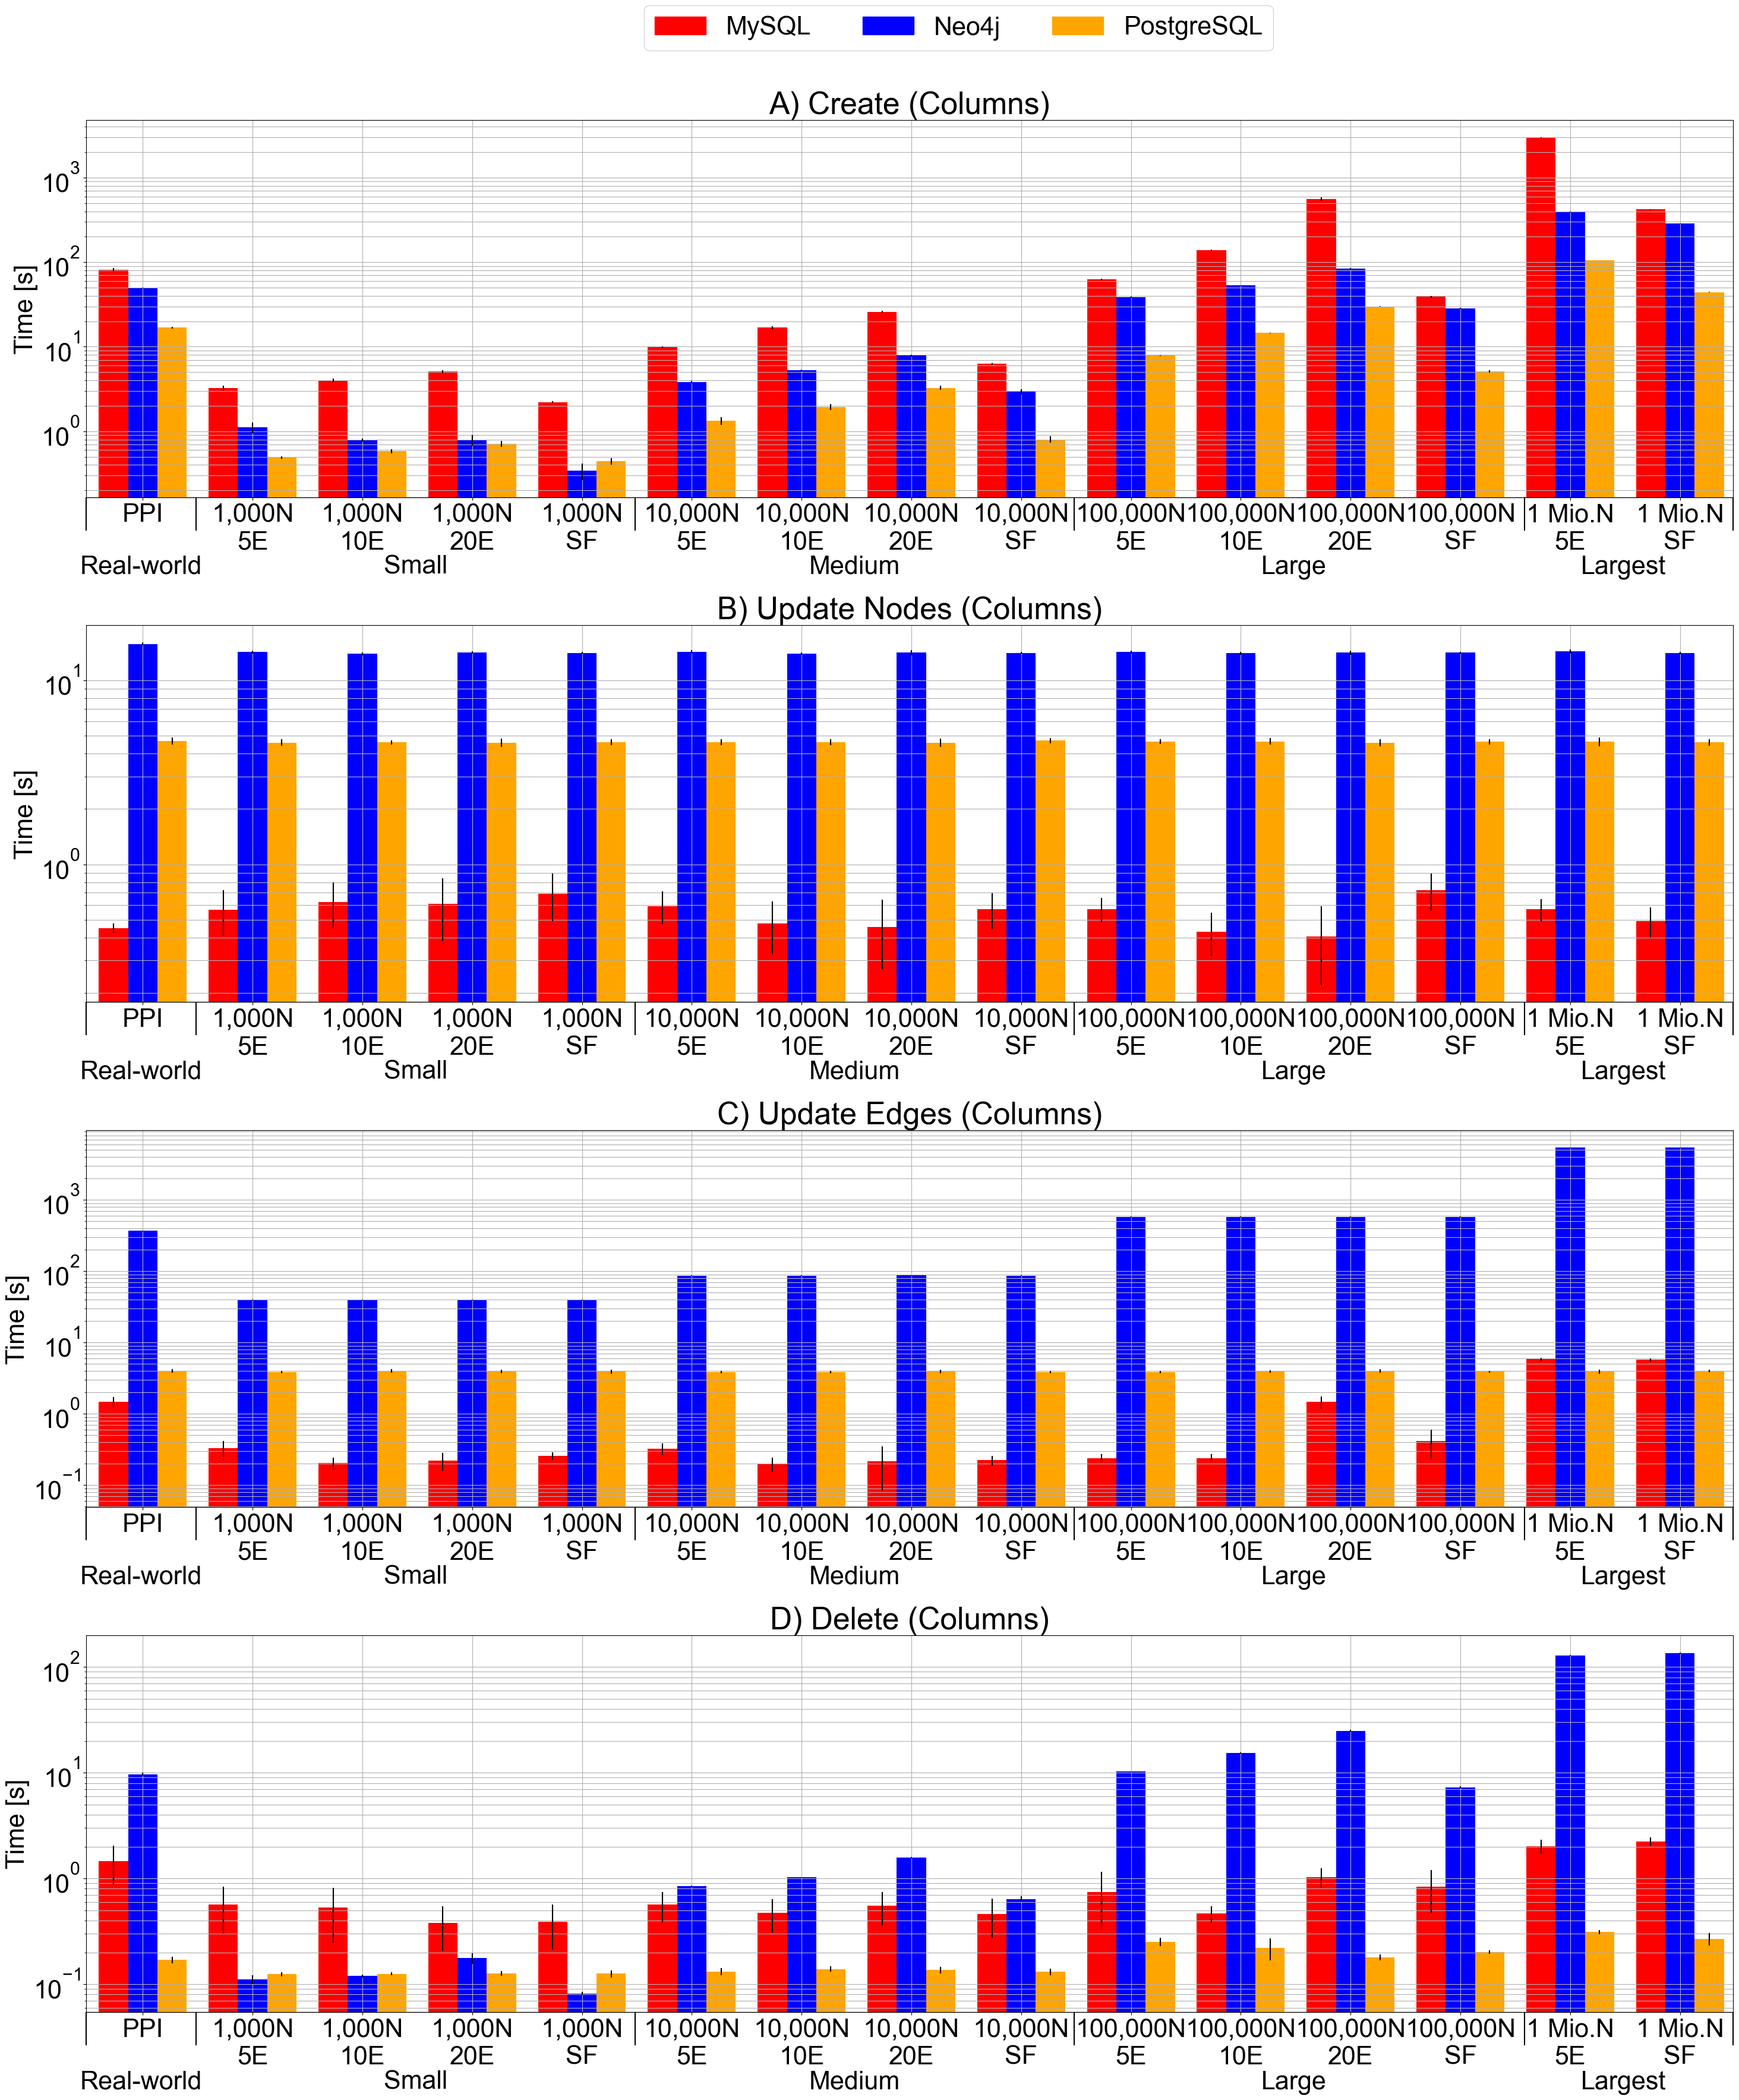

In [42]:
plot_crud_operations(header_dfs_dict, header_dfs_std_dict, filter_key = "col", read_plot=False)

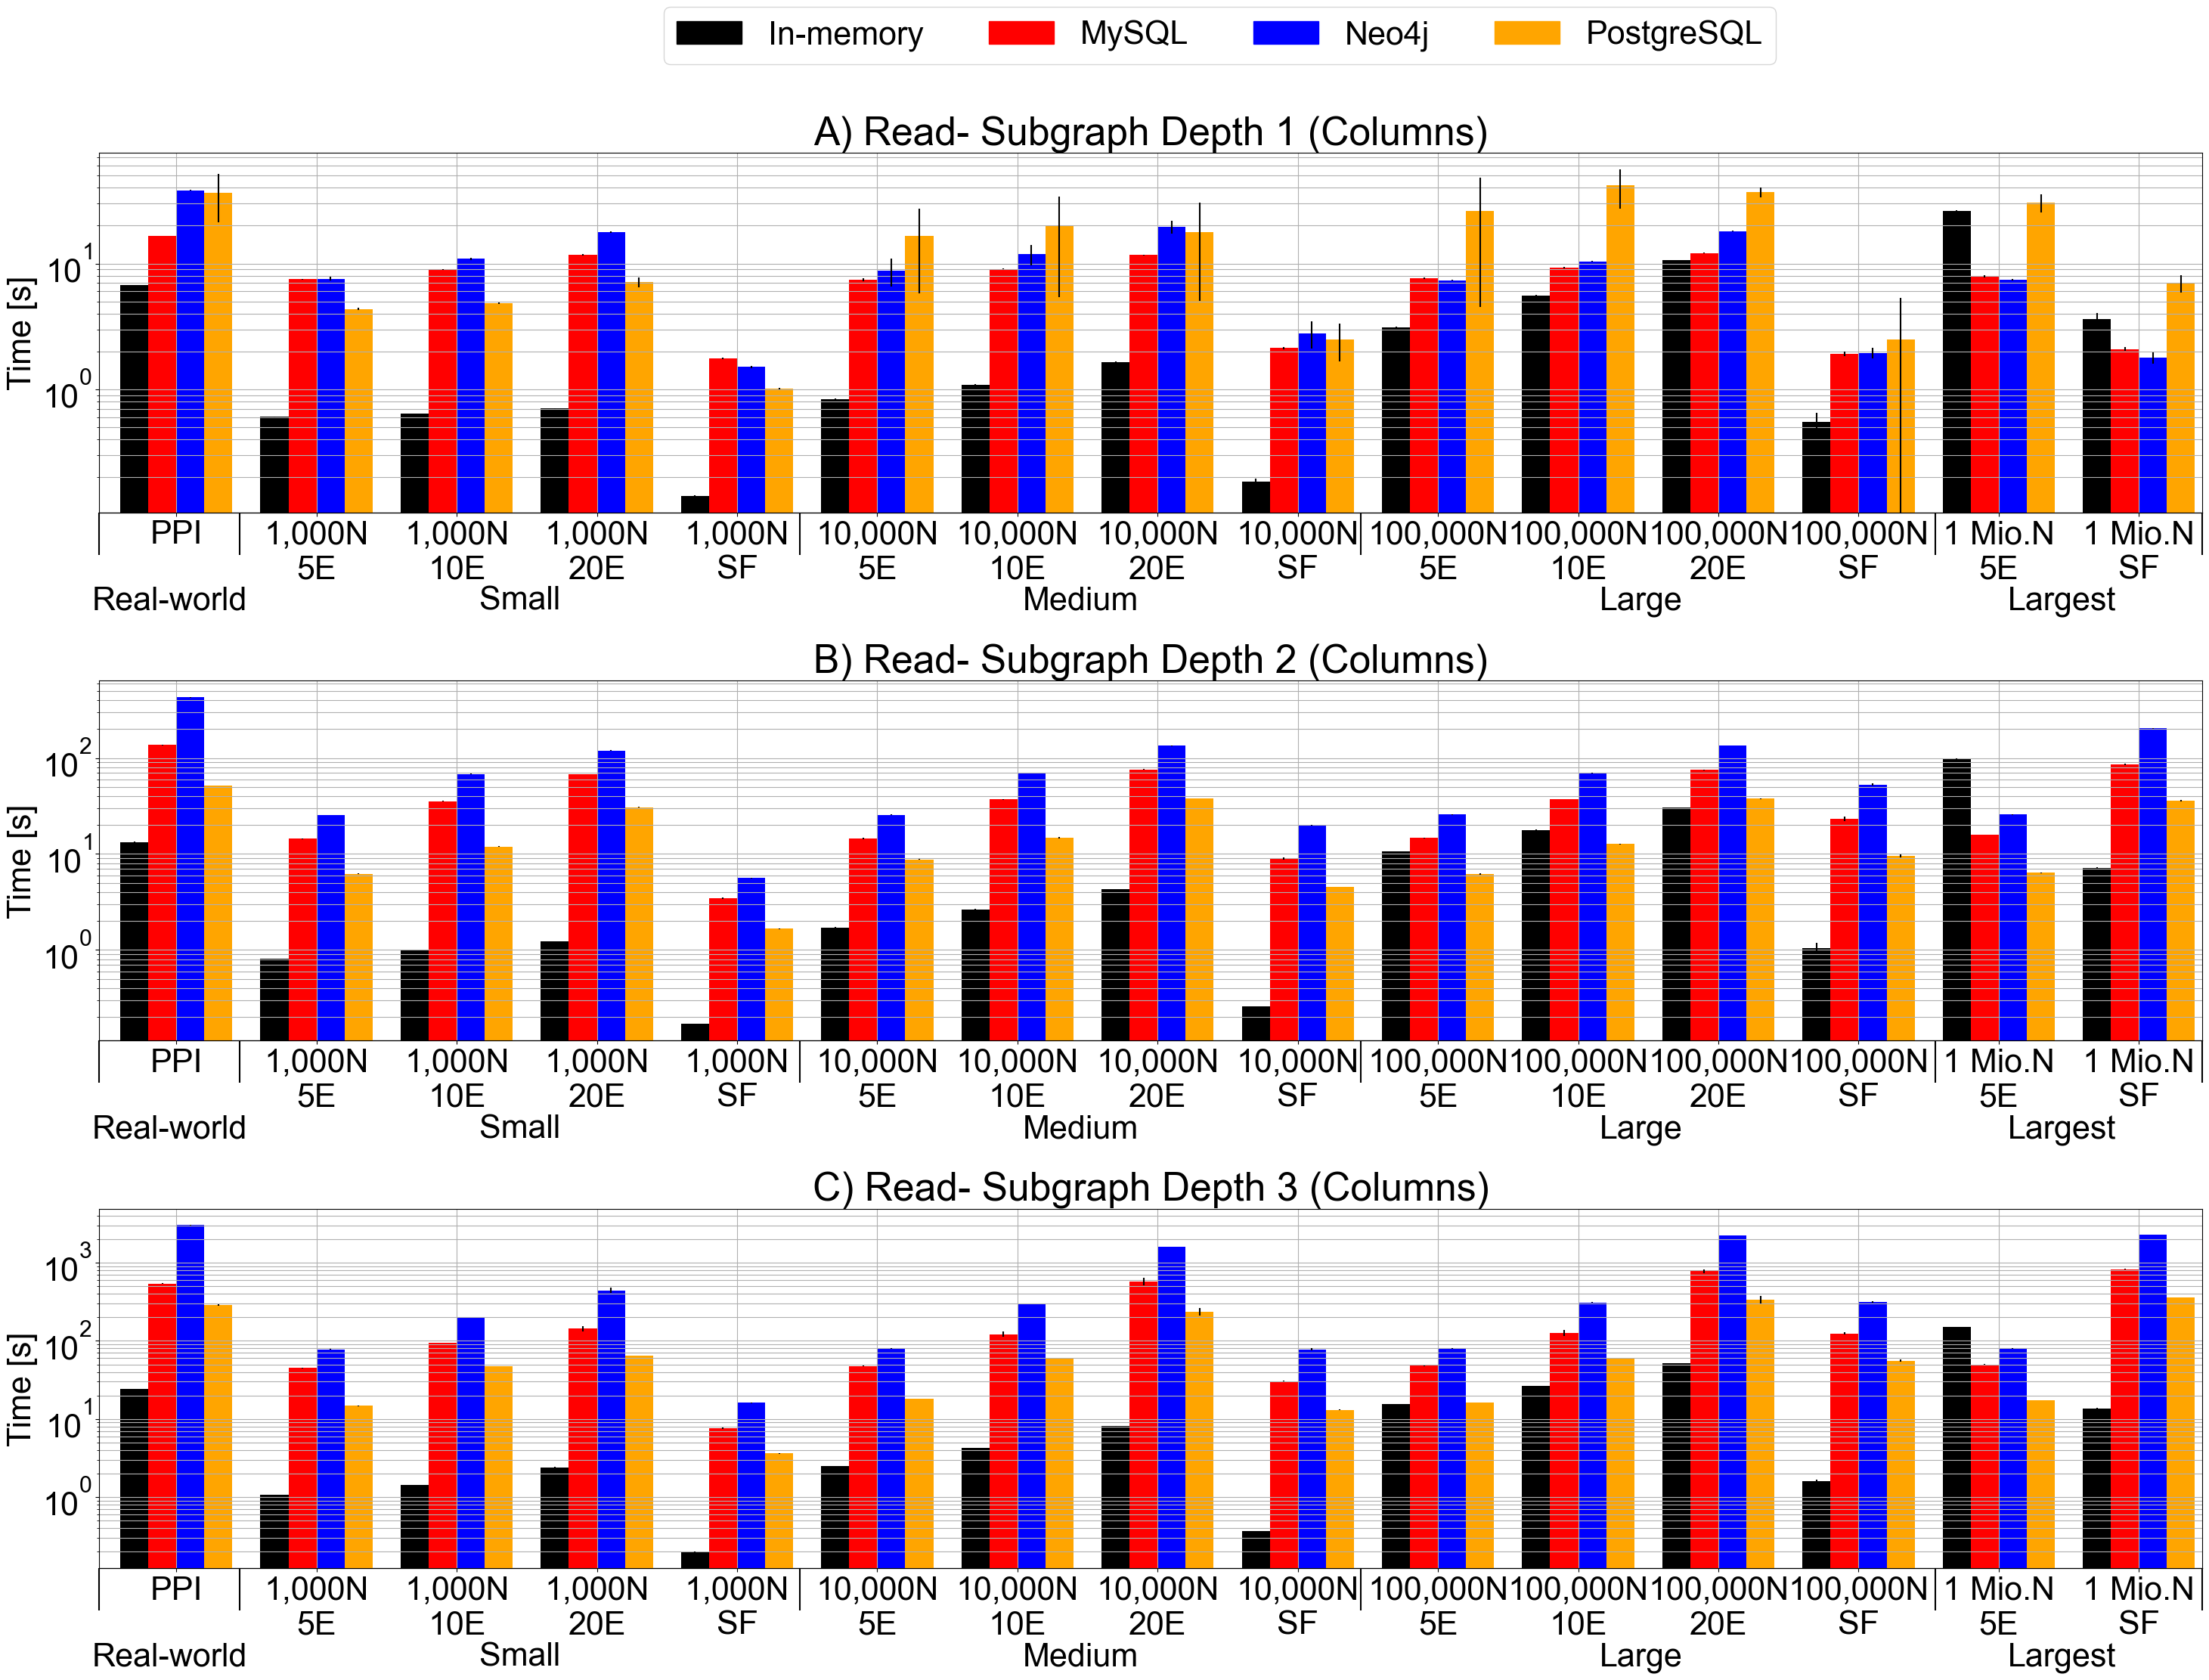

In [43]:
plot_crud_operations(header_dfs_dict, header_dfs_std_dict, filter_key = "col", read_plot=True)

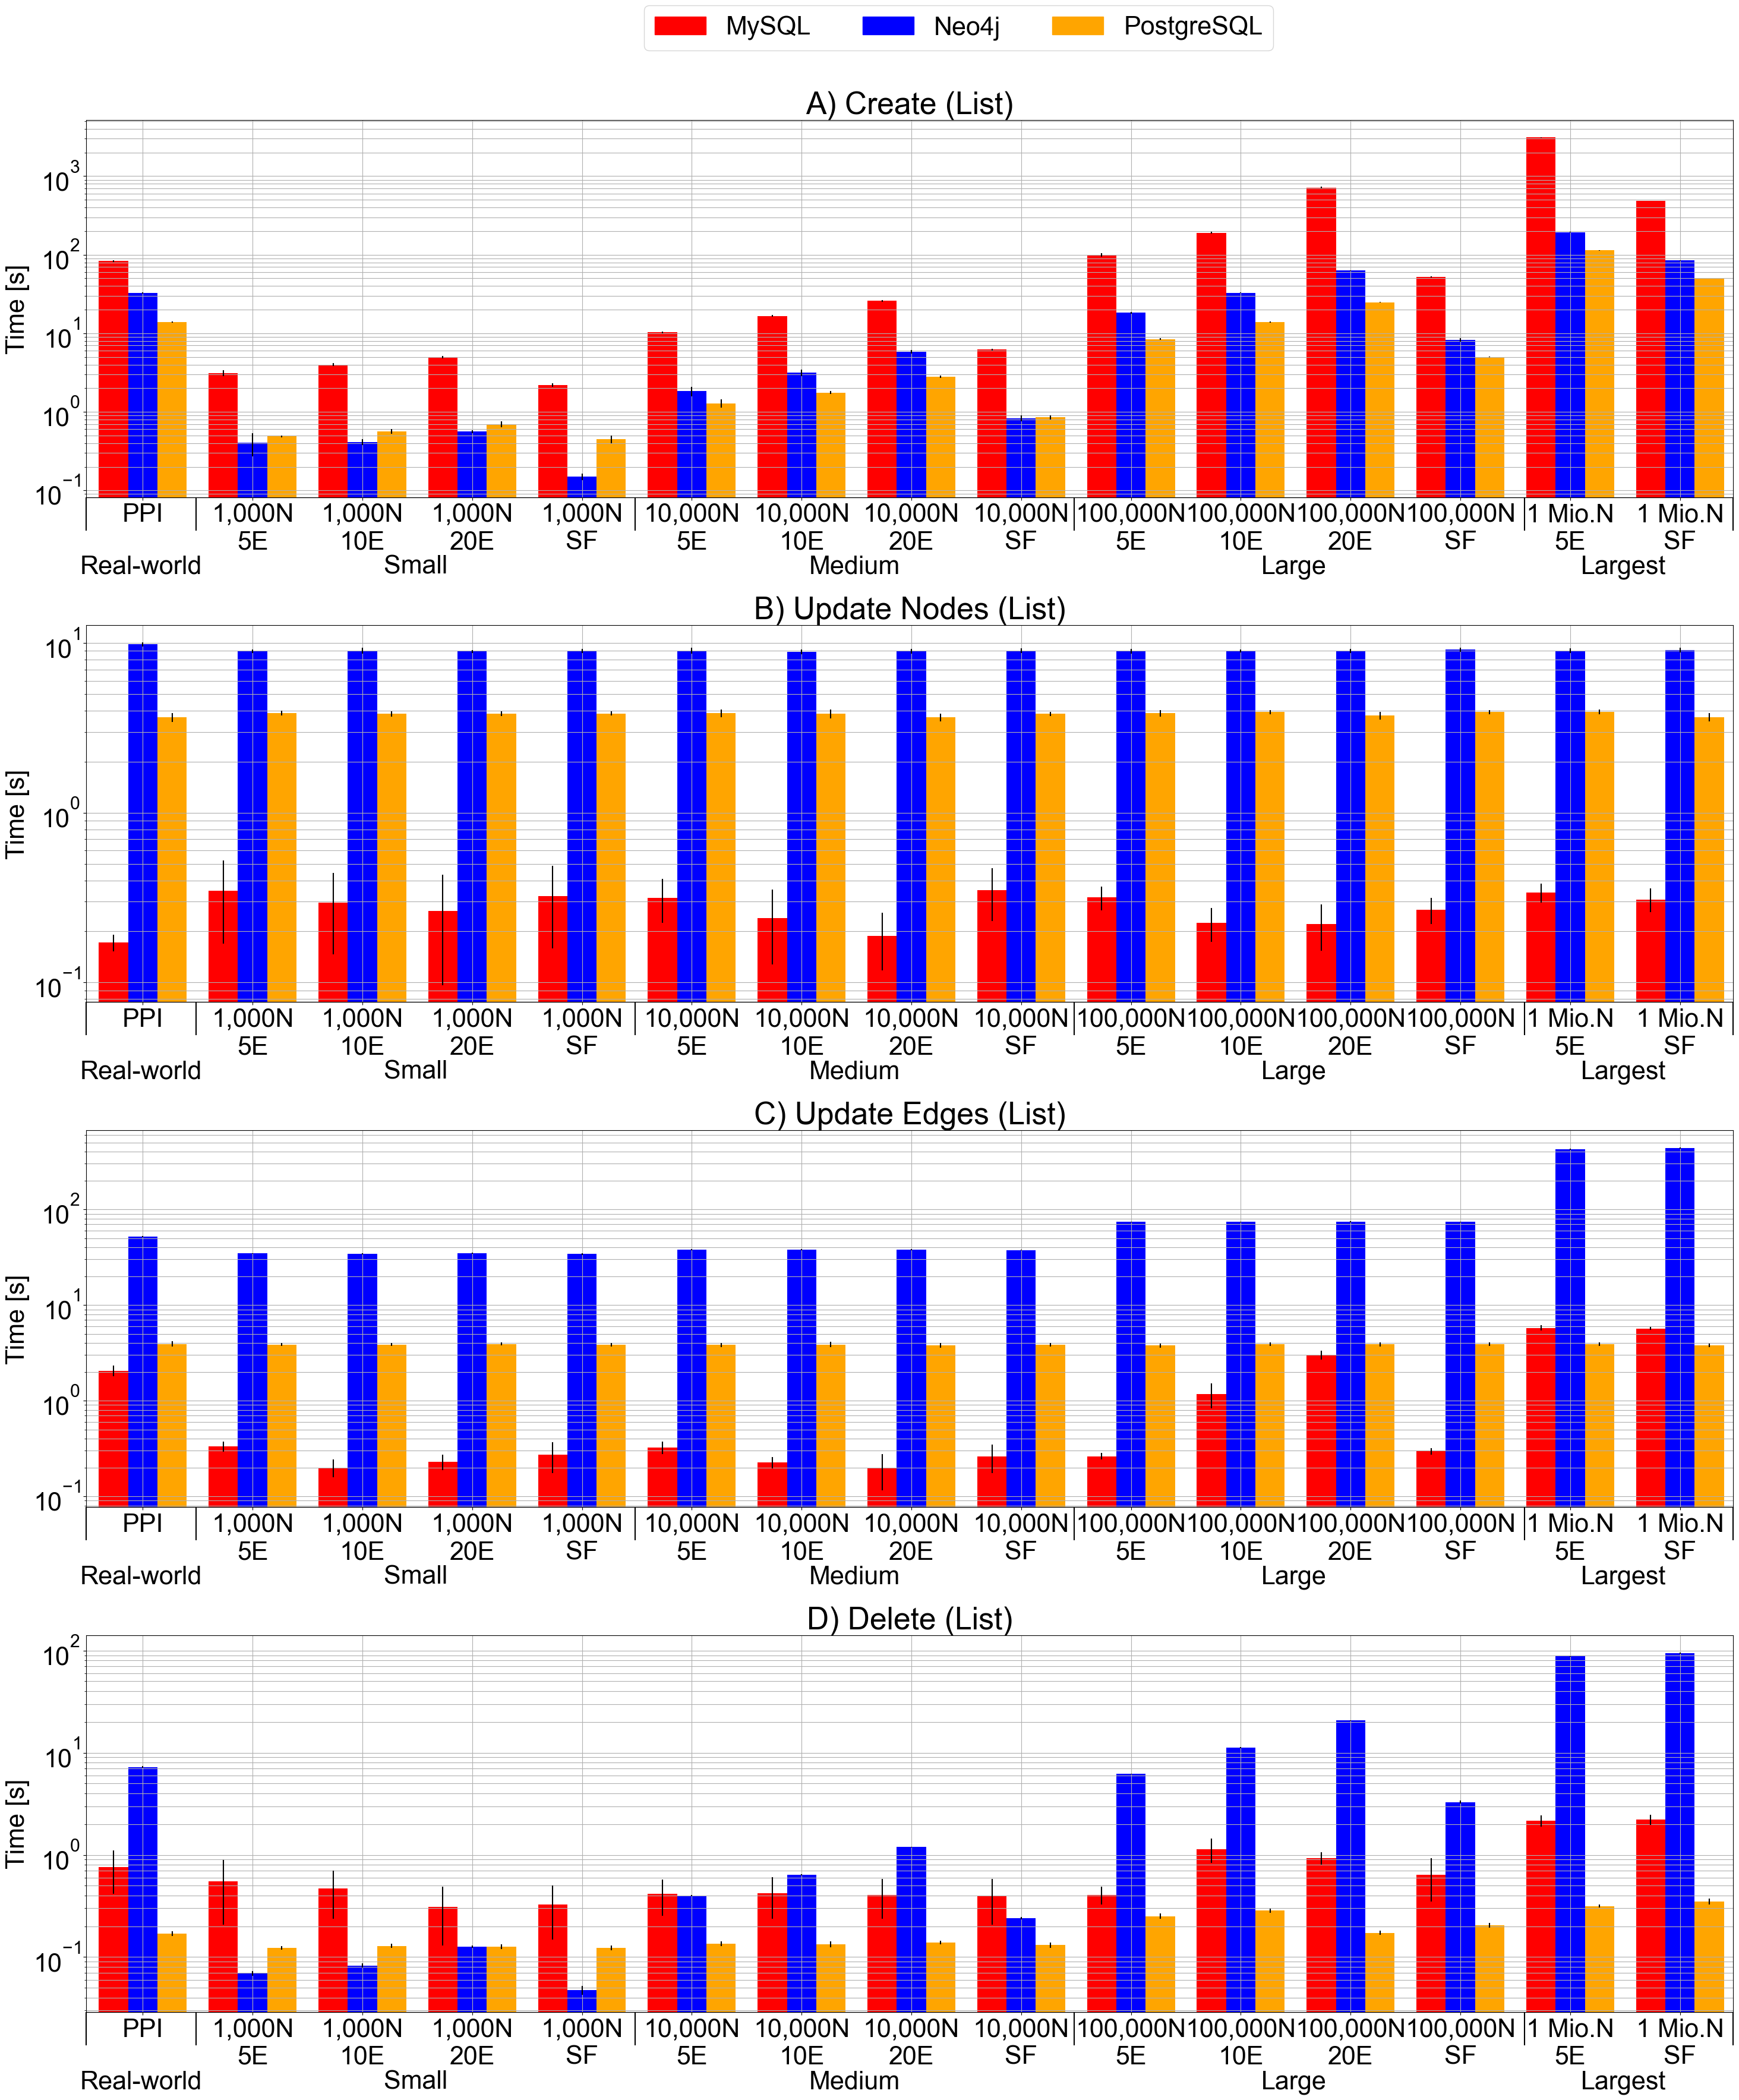

In [44]:
plot_crud_operations(header_dfs_dict, header_dfs_std_dict, "list", False)

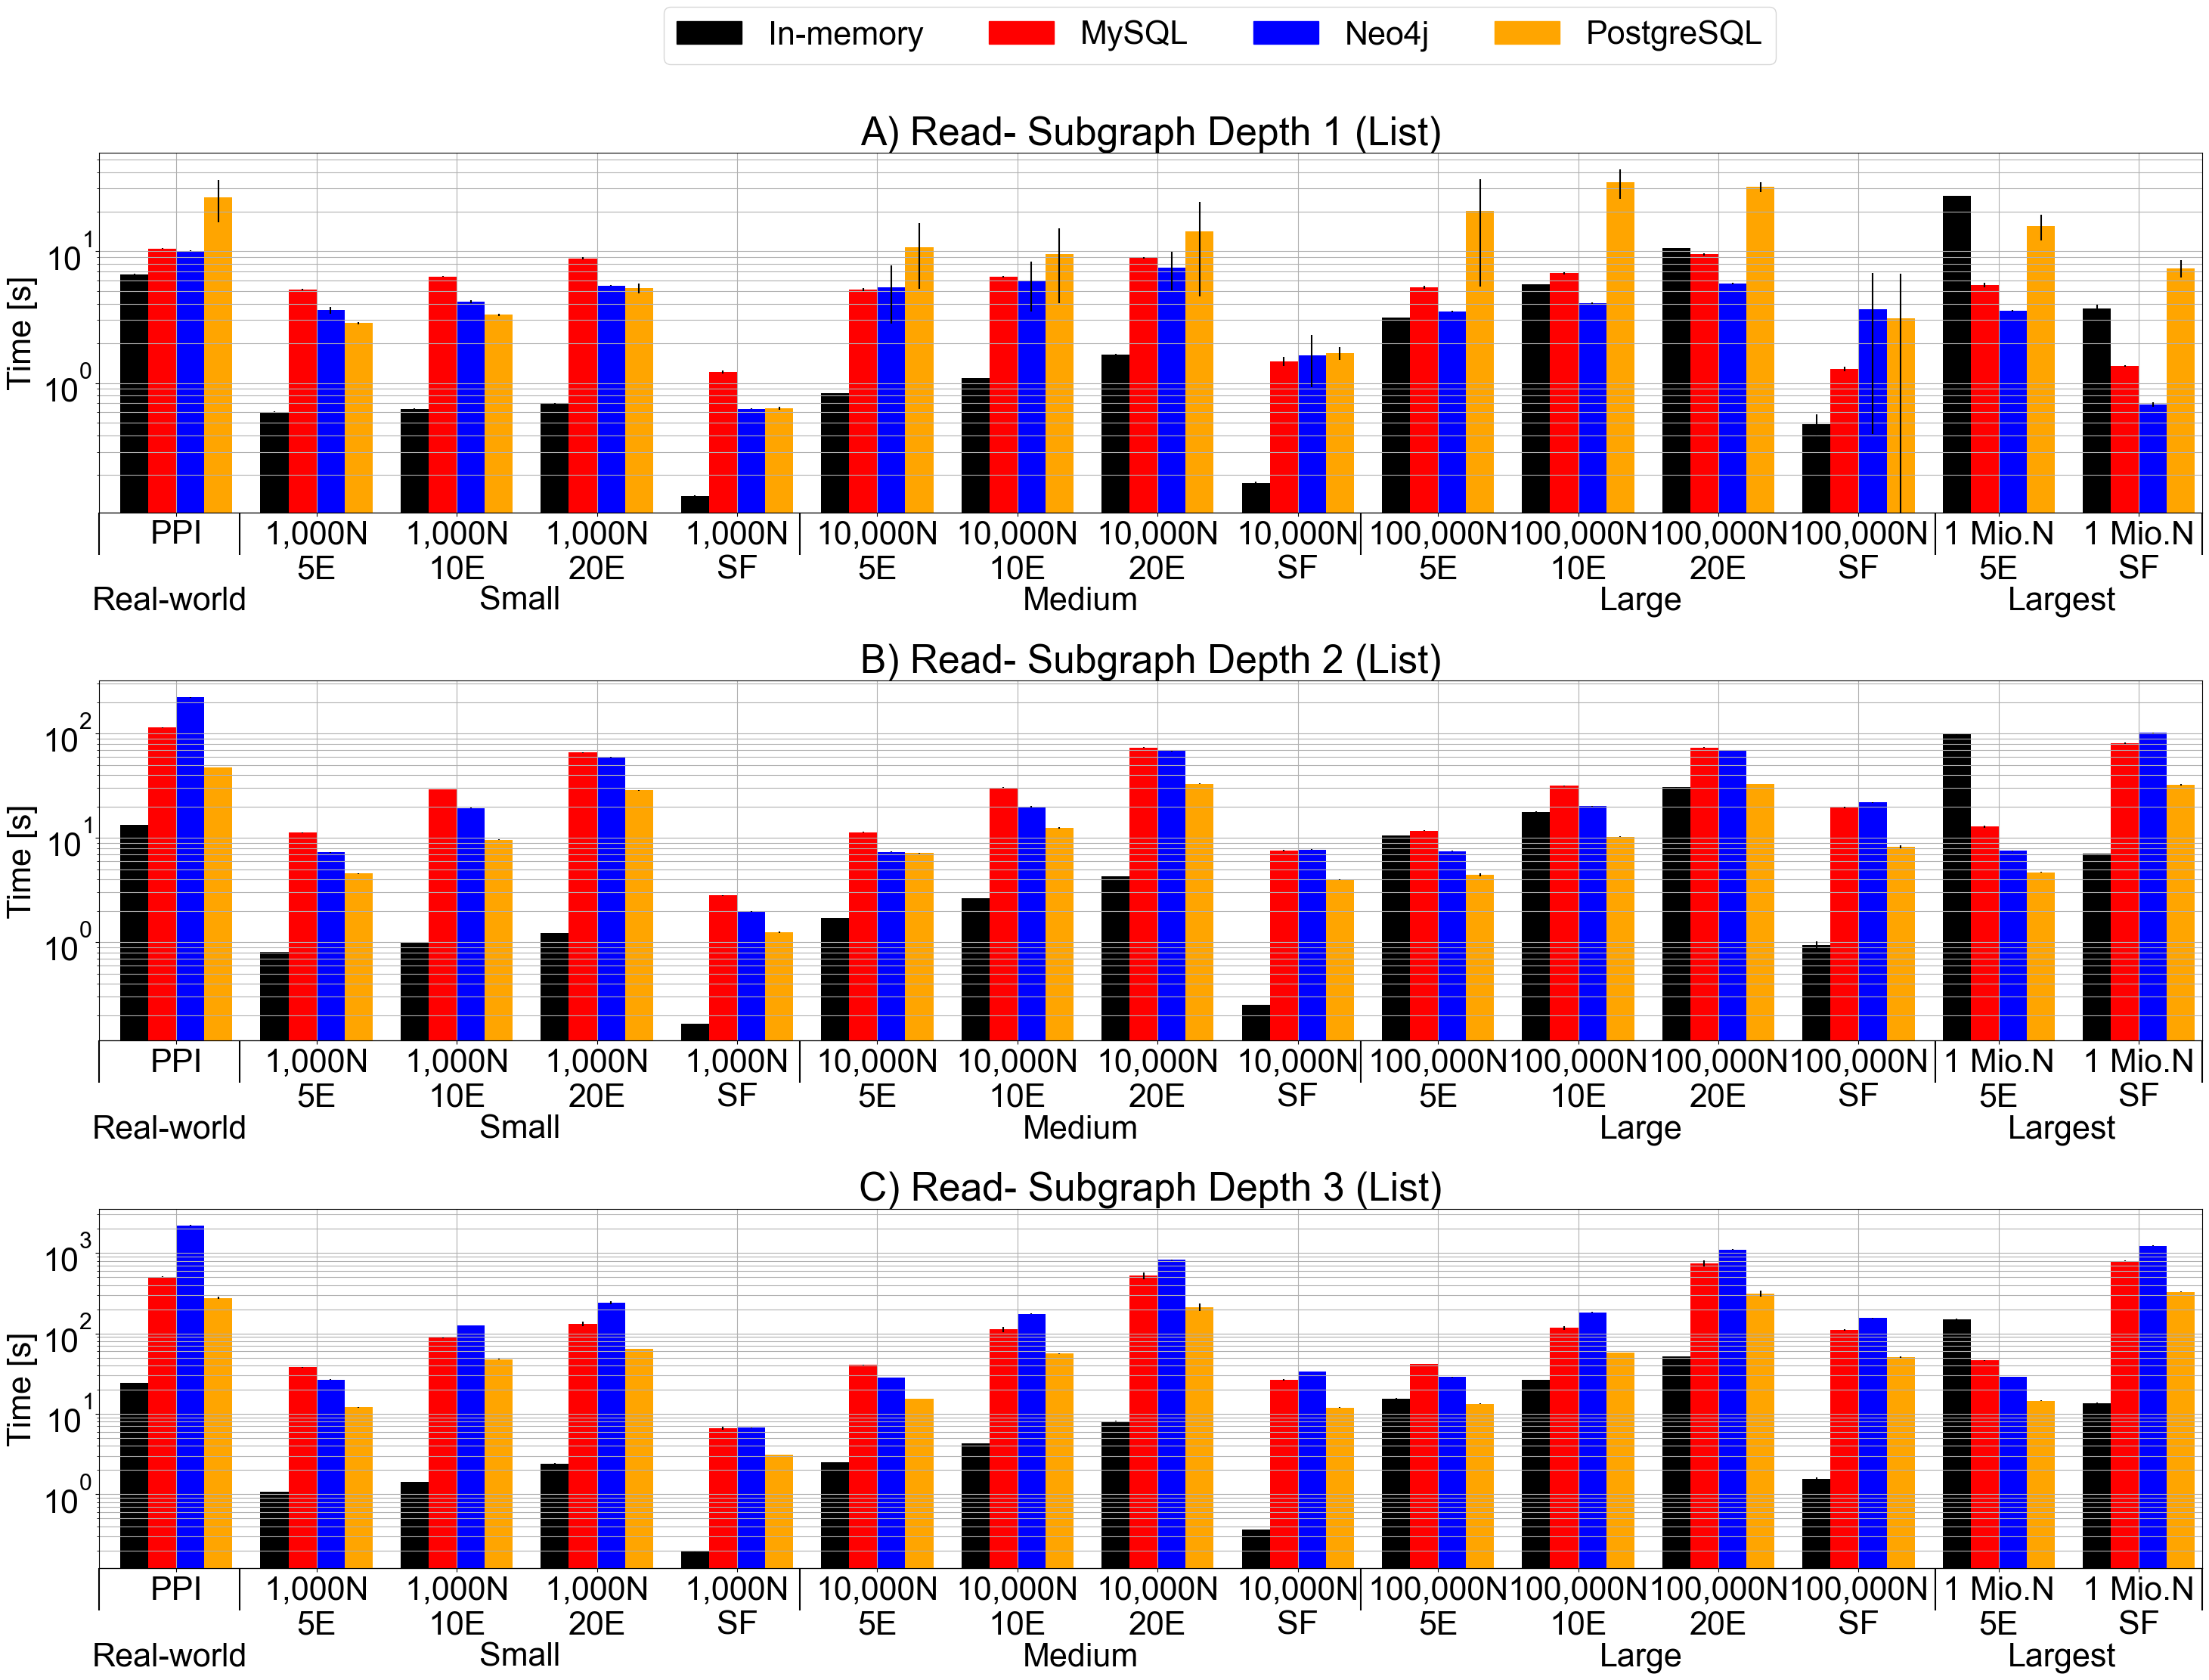

In [45]:
plot_crud_operations(header_dfs_dict, header_dfs_std_dict, "list", True)

In [41]:
import seaborn as sns
sns.set(font_scale=1.2)
def process_dataset_label(label: str):
    return label.replace("nodes", "N ").replace("edges", "E")\
                .replace("scale_free", "SF").replace("_", "").replace("000000", " Mio.")[::-1]\
                .replace("000", "000,")[::-1]

def plot_heatmap(keys):
    fig, axs = plt.subplots(len(keys), 1, sharex=False, figsize = (13, int(2.5*len(keys))))
    filtered_header_dfs_dict = {key: header_dfs_dict[key] for key in keys}
    for i, key in enumerate(filtered_header_dfs_dict):
        
        df = header_dfs_dict[key]
        in_mem_cols = list(filter(lambda db: "mem" in db, df.columns))
        for col in in_mem_cols:
            df.pop(col)        
        datasets = list(map(process_dataset_label, df.index)) 
        dbs = df.columns
        min_vals = df.min(axis=1).values.reshape(-1, 1)
        max_vals = df.max(axis=1).values.reshape(-1, 1)
        normed_vals = (df.values - min_vals) / (max_vals - min_vals)
        normed_df = pd.DataFrame(data = normed_vals, columns=dbs, index = datasets)
        sorted_columns = sorted(dbs)
        df_sorted = normed_df.reindex(columns=sorted_columns)
        #fig, axs = plt.subplots()
        sns.heatmap(df_sorted, cmap="crest", linewidths=1, ax=axs[i], cbar = False)
        axs[i].set_ylabel(key.capitalize())
        axs[i].xaxis.set_ticks_position('top')
        axs[i].tick_params(axis='x')
        
        if i != 0:
            axs[i].set_xticks([])
    cbar = fig.colorbar(axs[-1].collections[0], ax=axs[-1], location='bottom', fraction=0.1, pad=0.04, orientation='horizontal')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.03)

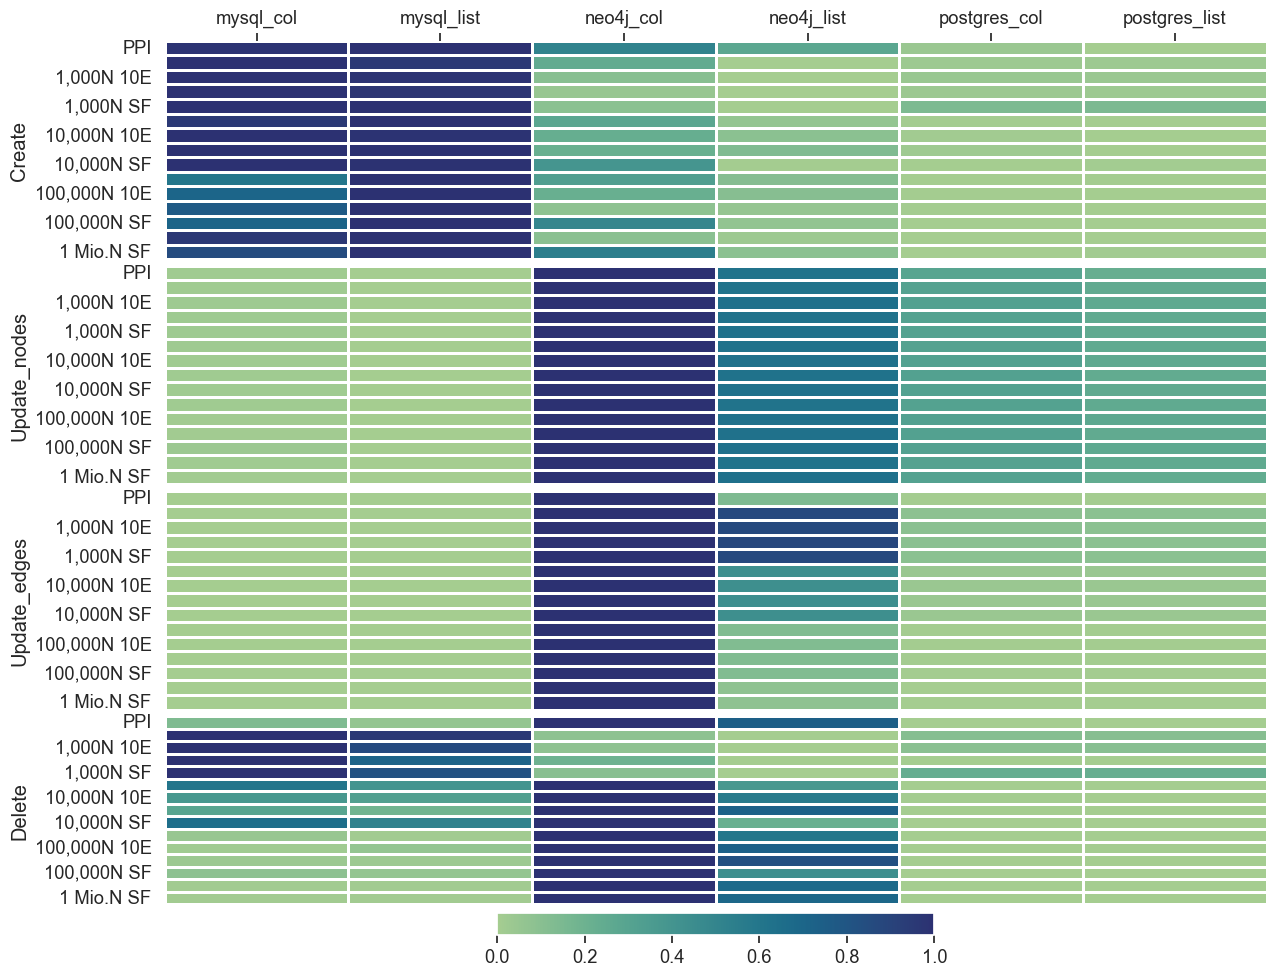

In [42]:
read_keys = list(filter(lambda key: "read" in key and "mem" not in key, list(header_dfs_dict.keys())))
cud_keys = list(filter(lambda key: "read" not in key, list(header_dfs_dict.keys())))
plot_heatmap(cud_keys)

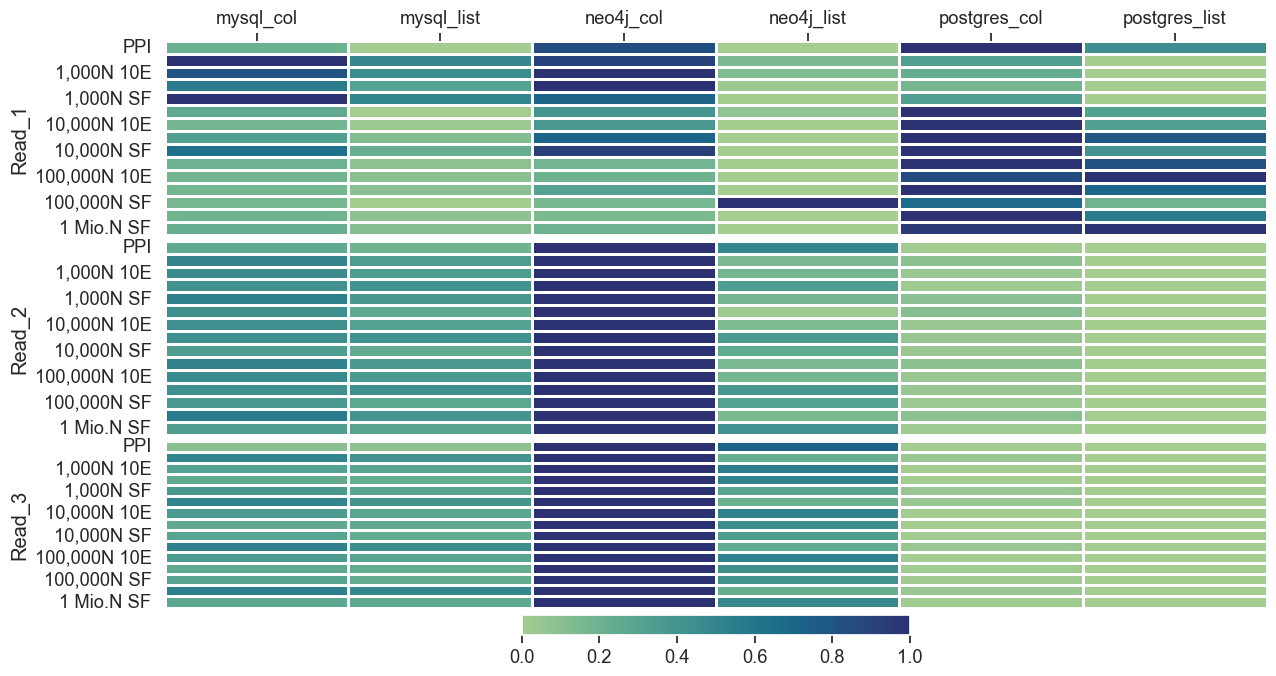

In [22]:
plot_heatmap(read_keys)

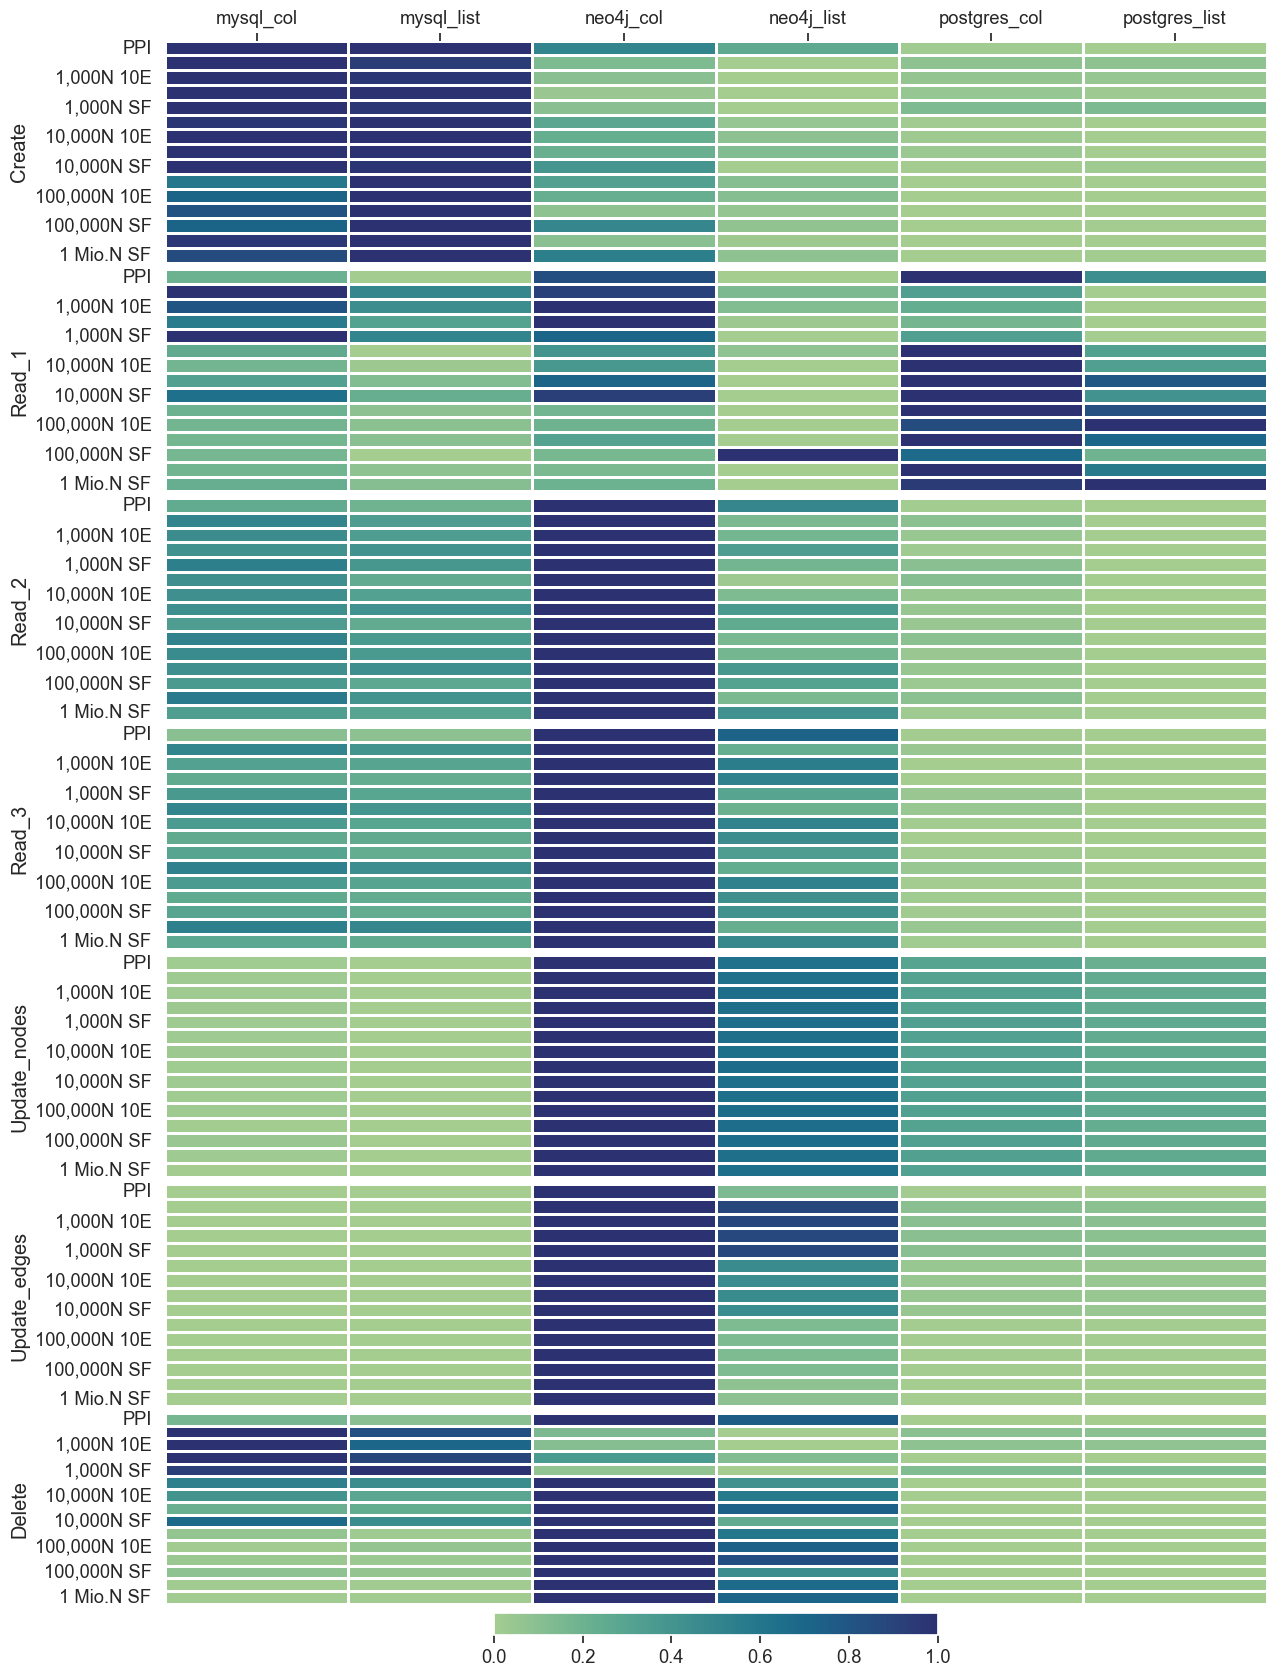

In [23]:
plot_heatmap([cud_keys[0], *read_keys, *cud_keys[1:]])

In [24]:
import matplotlib 
matplotlib.__version__

'3.7.3'